# Step 1 - Load the data set

* After loading the dataset, we select the 3rd and 4th columns which will be our X1, X2 attributes respectively and the 9th column which provides the output-response y. 

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd
import numpy as np
results = []
with open('DataSet2.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(';'))
    print(results[0:10])

data = pd.DataFrame(results, columns = list("abcdefghi"))
data = data.drop(['a', 'b'], 1)
data = data.drop(data.index[0])
data = data[['c', 'd', 'i']]
data = data[(data[['c','d','i']] != '?').all(axis=1)]
data



Saving DataSet2.txt to DataSet2 (1).txt
User uploaded file "DataSet2.txt" with length 132960755 bytes
[['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], ['16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', '17.000'], ['16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', '16.000'], ['16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000', '0.000', '1.000', '17.000'], ['16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:31:00', '3.700', '0.520', '235.220', '15.800', '0.000', '1.000

,c,d,i
1,4.216,0.418,17.000
2,5.360,0.436,16.000
3,5.374,0.498,17.000
4,5.388,0.502,17.000
5,3.666,0.528,17.000
6,3.520,0.522,17.000
7,3.702,0.520,17.000
8,3.700,0.520,17.000
9,3.668,0.510,17.000
10,3.662,0.510,16.000


#  Some preprocessing

* Here, we assign float values to our dataframe's content and find the minimum and maximum values of each one of the **X1** and **X2** attributes.

In [2]:
L_float = data.as_matrix(columns=None)
#Convert all values to float.
data3D = L_float.astype(np.float)
print(data3D.shape)

#Find min, max values for both attributes.
lim1=data3D[:,0].min()
print(lim1)

lim2=data3D[:,0].max()
print(lim2)

print()

lim3=data3D[:,1].min()
print(lim3)

lim4=data3D[:,1].max()
print(lim4)

(2049280, 3)
0.076
11.122
()
0.0
1.39





* Next, we generate our new query data set, where the query's attributes **X1**, **X2** and **z** are randomly chosen from a **Normal distribution**, where  *X1 ~ N(mu1, sigma1^2)*, *X2~N(mu2, sigma2^2)* and *z~N(mu3, sigma3^2)*.  





In [3]:
import random
import numpy as np

#Generate X1,X2,z using random normal distribution.
mu1, sigma1 = 0, (lim2 - lim1)/2 # mean and standard deviation
X1 = np.abs(np.random.normal(mu1, sigma1, 200))
mu2, sigma2 = 0, (lim4 - lim3)/2 # mean and standard deviation
X2 = np.abs(np.random.normal(mu2, sigma2, 200))
mu3, sigma3 = (0.05 * mu1 + 0.05 * mu2), (0.02 * sigma1 + 0.02 * sigma2)  # mean and standard deviation
z = np.abs(np.random.normal(mu3, sigma3, 200))

print(X1)
print()
print(X2)
print()
print(z)

[3.77729233e+00 4.70882628e+00 5.12209839e+00 3.62928872e+00
 1.55010998e+00 7.60989144e+00 1.04516540e+01 7.22057178e+00
 2.65185924e-01 3.47012482e+00 6.37599527e+00 6.74261911e+00
 1.04963588e+01 7.53407889e-01 1.02246237e+01 9.56156585e+00
 7.55207768e+00 5.85180848e-01 3.59830728e+00 1.04117036e+01
 3.89455075e+00 9.77209124e+00 9.60586123e+00 9.73293138e-01
 1.64785998e+01 4.97027720e+00 3.42399221e+00 2.41327984e+00
 6.25651606e+00 5.67179830e+00 3.08404893e-01 3.43916412e+00
 4.24199054e+00 7.70856720e-01 8.04349517e+00 5.24733070e+00
 3.02712192e+00 7.23767915e+00 4.65355761e+00 3.41573414e-01
 2.60948652e+00 1.31620501e+00 6.76914734e-01 3.94680065e-01
 1.91063707e+00 5.18883505e+00 2.92406222e+00 1.63514050e+00
 7.61155235e+00 6.34136758e+00 6.77188088e+00 1.50551057e+01
 1.04046656e+01 2.61035674e+00 4.85905067e+00 2.62894385e+00
 1.50149142e+01 6.56767263e-01 6.04048435e+00 1.11567559e+00
 2.45567828e+00 4.94118040e-01 5.67142197e+00 2.17751036e+00
 6.82203372e+00 9.760881

* We **merge** the lists of X1, X2 and z into one array

In [4]:
X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
QA_dataset = np.empty((len(X1),4))
QA_dataset[:,0] = X1_flattened
QA_dataset[:,1] = X2_flattened
QA_dataset[:,2] = z
QA_dataset[:,3] = 0
print(QA_dataset)

[[3.77729233e+00 4.62424049e-01 1.21975977e-01 0.00000000e+00]
 [4.70882628e+00 7.80076551e-01 1.22494189e-01 0.00000000e+00]
 [5.12209839e+00 1.69846775e+00 9.92244321e-02 0.00000000e+00]
 [3.62928872e+00 4.37631977e-01 8.94918525e-02 0.00000000e+00]
 [1.55010998e+00 8.64279241e-01 5.76358172e-02 0.00000000e+00]
 [7.60989144e+00 7.80145247e-01 7.25786303e-04 0.00000000e+00]
 [1.04516540e+01 2.24344257e-01 6.38074851e-02 0.00000000e+00]
 [7.22057178e+00 5.36883171e-02 1.47143161e-01 0.00000000e+00]
 [2.65185924e-01 1.06882200e+00 7.22344390e-02 0.00000000e+00]
 [3.47012482e+00 6.30420576e-01 8.26457403e-02 0.00000000e+00]
 [6.37599527e+00 5.79200808e-01 3.75596538e-02 0.00000000e+00]
 [6.74261911e+00 4.27509552e-02 1.28137214e-02 0.00000000e+00]
 [1.04963588e+01 1.22970009e-02 5.91267496e-02 0.00000000e+00]
 [7.53407889e-01 9.80654780e-01 1.95599134e-01 0.00000000e+00]
 [1.02246237e+01 3.13294867e-01 8.44162280e-02 0.00000000e+00]
 [9.56156585e+00 7.04792651e-01 4.49687811e-02 0.000000

# Step 2 - Training the Model

* Here we **calculate** the true answers of QA_dataset array, based on the downloaded dataset data3D.
For this purpose, we use the *calculate_y()* function.

In [5]:
def calculate_y(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[2])
        iter+=1
    #If there is no data point assigned to our query, increase (double) the radius. 
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[2])
          iter+=1  
    #If, still there is no data point assigned to our query, increase (double) the radius.
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[2])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
#Run the algorithm.      
x_list = calculate_y(QA_dataset, data3D[0:2000000])
#print(x_list)
#In case there is a query that did not match to any datapoint from data3D, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[14.41834743 13.65957447 16.1119403  13.65751921  4.66666667 16.0530504
 16.33333333 15.89855072  0.51576757 14.66190476 10.         16.00757576
 16.          0.55555556 17.         16.         16.52380952  1.
 14.80110328 15.42857143 15.04691517 15.4        11.          1.
  0.         18.         14.62504095 15.64837997 15.9704142  14.89400922
  0.36062378 18.         15.39923954  0.76923077 16.36363636 14.52344546
 14.32316903 16.84615385 14.51315789  0.38685939 12.11535462  5.51720311
  0.7742017   0.46153846 14.59491194 15.84859155 14.70629371  8.42140468
 15.90322581 13.73333333 15.68        0.         16.         14.51950355
 14.37096774 13.79393939  0.          0.7314653  18.          5.85804835
 15.27710843  0.44456247  9.         16.87631857 15.6875      0.43647819
 14.35714286  0.36595745  0.48903621  1.         17.         14.7829663
 17.         12.30195295 15.93548387 16.         17.27083333 14.83333333
 14.78723404  0.44638571 17.14285714 16.25       19.6        22.
 14.

* We **merge** the true answers **y** with the **X1**, **X2** and **z** attributes of the QA_dataset, into a new matrix of 4 columns with attributes X1, X2, z, y in incremental order.

In [6]:
QA_dataset[:,3] = real_y
print(QA_dataset)

[[3.77729233e+00 4.62424049e-01 1.21975977e-01 1.44183474e+01]
 [4.70882628e+00 7.80076551e-01 1.22494189e-01 1.36595745e+01]
 [5.12209839e+00 1.69846775e+00 9.92244321e-02 1.61119403e+01]
 [3.62928872e+00 4.37631977e-01 8.94918525e-02 1.36575192e+01]
 [1.55010998e+00 8.64279241e-01 5.76358172e-02 4.66666667e+00]
 [7.60989144e+00 7.80145247e-01 7.25786303e-04 1.60530504e+01]
 [1.04516540e+01 2.24344257e-01 6.38074851e-02 1.63333333e+01]
 [7.22057178e+00 5.36883171e-02 1.47143161e-01 1.58985507e+01]
 [2.65185924e-01 1.06882200e+00 7.22344390e-02 5.15767568e-01]
 [3.47012482e+00 6.30420576e-01 8.26457403e-02 1.46619048e+01]
 [6.37599527e+00 5.79200808e-01 3.75596538e-02 1.00000000e+01]
 [6.74261911e+00 4.27509552e-02 1.28137214e-02 1.60075758e+01]
 [1.04963588e+01 1.22970009e-02 5.91267496e-02 1.60000000e+01]
 [7.53407889e-01 9.80654780e-01 1.95599134e-01 5.55555556e-01]
 [1.02246237e+01 3.13294867e-01 8.44162280e-02 1.70000000e+01]
 [9.56156585e+00 7.04792651e-01 4.49687811e-02 1.600000

* Here we apply **Principal Component Analysis** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

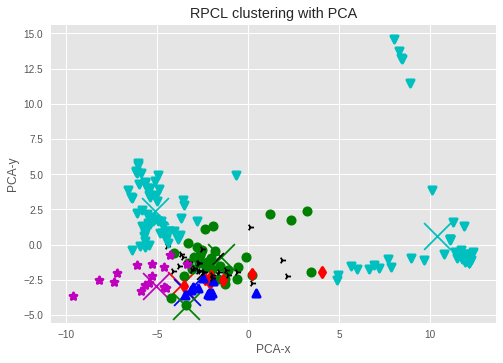

('\t\t', 'Cluster 1 has: 32 data points')
('\t\t', 'Cluster 2 has: 50 data points')
('\t\t', 'Cluster 3 has: 7 data points')
('\t\t', 'Cluster 4 has: 12 data points')
('\t\t', 'Cluster 5 has: 26 data points')
('\t\t', 'Cluster 6 has: 15 data points')
('\t\t', 'Cluster 7 has: 2 data points')
('\t\t', 'Cluster 8 has: 56 data points')


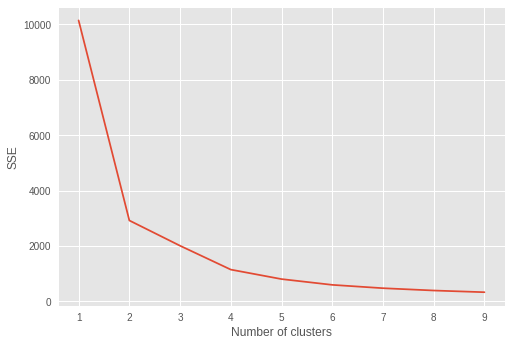

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(QA_dataset)
#print(sklearn_pca_x)


markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(sklearn_pca_x)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with PCA')
plt.xlabel('PCA-x')
plt.ylabel('PCA-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))

#Here we plot the Sum of distances of each cluster's datapoints from their respective centroid.
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sklearn_pca_x)
    labels1 = kmeans.labels_
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center.
    
#The plot showcases the error with respect to the number of clusters for K-Means algorithm.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("")
plt.show()

* We also apply **t-SNE** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

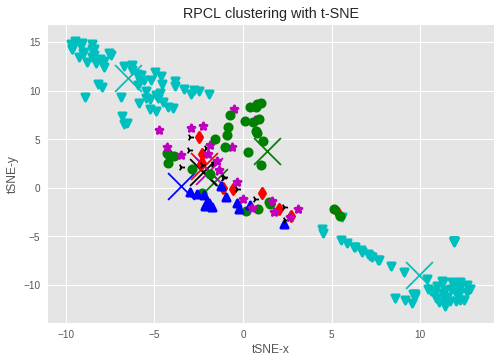

('\t\t', 'Cluster 1 has: 11 data points')
('\t\t', 'Cluster 2 has: 55 data points')
('\t\t', 'Cluster 3 has: 10 data points')
('\t\t', 'Cluster 4 has: 14 data points')
('\t\t', 'Cluster 5 has: 13 data points')
('\t\t', 'Cluster 6 has: 19 data points')
('\t\t', 'Cluster 7 has: 19 data points')
('\t\t', 'Cluster 8 has: 59 data points')


In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(QA_dataset)

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                 
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(x_test_2d)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with t-SNE')
plt.xlabel('tSNE-x')
plt.ylabel('tSNE-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))



# Step 3 - Predicting the Answer

* First, we generate a small set of **100 queries** with 3 attributes: X1, X2 and z using the **Normal distribution**.

In [15]:
import random
import numpy as np

#Generate 22 queries q=[X1,X2,z] with X1,X2 and z following the Normal distribution.
mu1, sigma1 = 0, (lim2 - lim1)/2 # mean and standard deviation
X1 = np.abs(np.random.normal(mu1, sigma1, 20))
mu2, sigma2 = 0, (lim4 - lim3)/2 # mean and standard deviation
X2 = np.abs(np.random.normal(mu2, sigma2, 20))
mu3, sigma3 = (0.05 * mu1 + 0.05 * mu2), (0.02 * sigma1 + 0.02 * sigma2)  # mean and standard deviation
z = np.abs(np.random.normal(mu3, sigma3, 20))


X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
query = np.empty((len(X1),3))
query[:,0] = X1_flattened
query[:,1] = X2_flattened
query[:,2] = z


print(query)

[[5.23115401e+00 9.85294223e-01 3.72374872e-02]
 [2.40847227e+00 1.05651462e-01 1.35885065e-01]
 [1.35421809e-02 4.47361019e-01 1.37044451e-02]
 [4.68550614e+00 4.49413187e-02 3.16550855e-02]
 [6.74390471e-01 3.54334560e-01 1.40105168e-02]
 [3.82127773e+00 8.73154433e-01 4.86291524e-02]
 [4.93099327e+00 6.85564116e-01 1.67384007e-01]
 [5.40957463e+00 3.49022614e-01 1.94437160e-02]
 [4.44879965e+00 4.99238409e-01 8.03307369e-02]
 [3.81051308e+00 1.32439343e-01 7.73447596e-02]
 [7.15779543e+00 5.89433279e-01 4.92086067e-03]
 [4.73689623e+00 1.41345004e+00 5.82540030e-02]
 [2.58451495e+00 1.67761368e+00 1.13518461e-02]
 [1.79492958e+00 4.42529853e-02 6.98427780e-02]
 [2.20339284e+00 1.18411418e-01 5.46536777e-02]
 [1.09945185e+01 2.30981716e-02 2.65949390e-01]
 [2.70009520e+00 1.08567104e-01 1.72252814e-01]
 [2.51729490e+00 2.54727929e-01 3.84039379e-02]
 [1.77634716e+00 1.02964567e+00 7.02068046e-02]
 [1.26577671e+01 1.36947037e+00 7.88160576e-02]]


* Same as in the Training phase of our model, here we **calculate** the true answers to our 100 new queries, based on the QA_dataset which we generated based on the downloaded data set.
For this purpose, we use the *calculate_y()* function.

In [16]:
def calculate_y_new(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[3])
        iter+=1
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[3])
          iter+=1  
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[3])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
      
#Run the algorithm.      
x_list = calculate_y_new(query, QA_dataset)
#print(x_list)
#In case there is a query that did not match to any datapoint from QA_dataset, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)

[14.77162548 12.1353123   1.00605885 15.44780517  2.66733684 16.78805031
 16.73880597 14.06251045 15.20178534 14.99857053 15.59108679 15.29389802
 10.64689629 14.7829663  12.63998253 15.15384615 12.11535462 12.59063284
  9.          0.        ]


* For the final part of the prediction phase, we use the *fit()* function to cluster the QA_dataset and we **predict** the answer-response for each query from the 100 queries, which we generated for evaluation, by classifying them to the clusters they belong to and assigning the cluster's centroid response, to the query's predicted response.


In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=5):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 10 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=10), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    
clf = K_Means()
clf.fit(QA_dataset)

#In pred_y list we store all the predicted answers y for every query, generated for validation.
pred_y = []
for query_data in query:
  print('Query: {number}'.format(number=query_data))
  #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
  #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
  distances = [np.linalg.norm(query_data[0:1] - clf.centroids[centroid][0:1]) for centroid in clf.centroids]
  prediction = distances.index(min(distances))
  print('Predicted Cluster: {number}'.format(number=prediction))
  s = np.asarray(clf.classifications[prediction])
  predicted_y = np.average(s, axis=0)[3]
  pred_y.append(predicted_y)
  print('---------------------------')
print('List of all the predicted answers y: {number}'.format(number=pred_y))




Query: [5.23115401 0.98529422 0.03723749]
Predicted Cluster: 1
---------------------------
Query: [2.40847227 0.10565146 0.13588506]
Predicted Cluster: 4
---------------------------
Query: [0.01354218 0.44736102 0.01370445]
Predicted Cluster: 4
---------------------------
Query: [4.68550614 0.04494132 0.03165509]
Predicted Cluster: 1
---------------------------
Query: [0.67439047 0.35433456 0.01401052]
Predicted Cluster: 4
---------------------------
Query: [3.82127773 0.87315443 0.04862915]
Predicted Cluster: 3
---------------------------
Query: [4.93099327 0.68556412 0.16738401]
Predicted Cluster: 1
---------------------------
Query: [5.40957463 0.34902261 0.01944372]
Predicted Cluster: 1
---------------------------
Query: [4.44879965 0.49923841 0.08033074]
Predicted Cluster: 1
---------------------------
Query: [3.81051308 0.13243934 0.07734476]
Predicted Cluster: 3
---------------------------
Query: [7.15779543e+00 5.89433279e-01 4.92086067e-03]
Predicted Cluster: 2
---------------

# Step 4 - Evaluating the results

* Here, we calulate the **Average Means Squared Error** between the true answer y and the predicted answer y' for our generated queries.

In [23]:
error = np.sum((pred_y - real_y)**2)
average_means_squared_error = np.sqrt(error)/(len(real_y))
print('RMSE = {number}'.format(number=average_means_squared_error))

RMSE = 1.44907176591


* The **Normalised Average Means Squared Error** (NRMSE) between the true answer y and the predicted answer y' for our generated queries is calculated below.

In [24]:
average_y = np.average(real_y, axis=0)

enumerator = (pred_y - real_y)**2
denominator = (real_y - average_y)**2
normalised_average_means_squared_error = np.sum(np.sqrt(enumerator / denominator)) / len(real_y)

print('NRMSE = {number}'.format(number=normalised_average_means_squared_error))

NRMSE = 9.32472548407


In [21]:
error = np.sum(np.abs(pred_y - real_y))
mean_absolute_error = error/(len(real_y))
print('MAE = {number}'.format(number=mean_absolute_error))

MAE = 4.10366026681


* We calculate the **Average Means Squared Error** (RMSE) for different k values, for* k=3,4,...,16* and plot the graph.

For K = 3 the Predictive Error is 1.14405081843
For K = 4 the Predictive Error is 1.32507707991
For K = 5 the Predictive Error is 1.32507707991
For K = 6 the Predictive Error is 1.34887142861
For K = 7 the Predictive Error is 1.39920463047
For K = 8 the Predictive Error is 1.46572268672
For K = 9 the Predictive Error is 1.46585549614
For K = 10 the Predictive Error is 1.46585549614
For K = 11 the Predictive Error is 1.46566516209
For K = 12 the Predictive Error is 1.46566516209
For K = 13 the Predictive Error is 1.46566516209
For K = 14 the Predictive Error is 1.44907176591
For K = 15 the Predictive Error is 1.44907176591


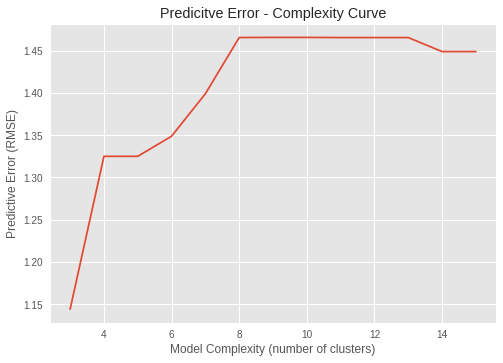

In [20]:
#We change the RPCL algorithm, to iterate over various k values.
def fit(k,data):
        #Create empty dictionary
        centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(k):
            centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        classifications= {}
            
        #Create a list
        for i in range(k):
            classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            centroids[classification] = centroids[classification] + 0.1 * (featureset - centroids[classification])
            centroids[second_winner_centroid] = centroids[second_winner_centroid] - 0.025 * (featureset - centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in classifications:
                if (len(classifications[classification])>19):
                  centroids[classification] = np.average(classifications[classification], axis=0)
            return centroids
          
complexity = list()    
temp = list()       
for k in range(3,16):
  clf = fit(k, QA_dataset)
  pred_y = []
  for query_data in query:
    #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
    #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
    distances = [np.linalg.norm(query_data[0:1] - clf[centroid][0:1]) for centroid in clf]
    prediction = distances.index(min(distances))
    s = clf[prediction]
    predicted_y = s[3]
    pred_y.append(predicted_y)
    
  error = np.sum((pred_y - real_y)**2)
  average_means_squared_error = np.sqrt(error)/(len(real_y))
  temp.append(average_means_squared_error)
  complexity.append(k)
  print('For K = {clusters} the Predictive Error is {number}'.format(clusters=k, number=average_means_squared_error))

plt.figure()
plt.plot(complexity, temp)
plt.xlabel("Model Complexity (number of clusters)")
plt.ylabel("Predictive Error (RMSE)")
plt.title("Predicitve Error - Complexity Curve")
plt.show()